In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# Configure system

In [2]:
Nx = 101
x_total_arr = np.linspace(0, 10.0, Nx+2)
x_arr = x_total_arr[1:-1]
Vx = np.full_like(x_arr, 0.0, dtype=float)
dx = x_arr[1] - x_arr[0]

In [3]:
from tdse.prop.propagator import Time_Indep_Hamil_Propagator

prop = Time_Indep_Hamil_Propagator(Nx, dx, Vx)

# Set initial state

In [4]:
t0 = 0.0
sf_t0_arr = np.sin(pi/10.0*x_arr) + 0.6*np.sin(2*pi/10.0*x_arr)

# Normalize (valid for equidistanced, both-zero-sided)
sf_t0_arr *= np.sqrt(dx * np.square(np.abs(sf_t0_arr)).sum())

# Animate

In [5]:
from matplotlib.animation import FuncAnimation

%matplotlib notebook

<IPython.core.display.Javascript object>


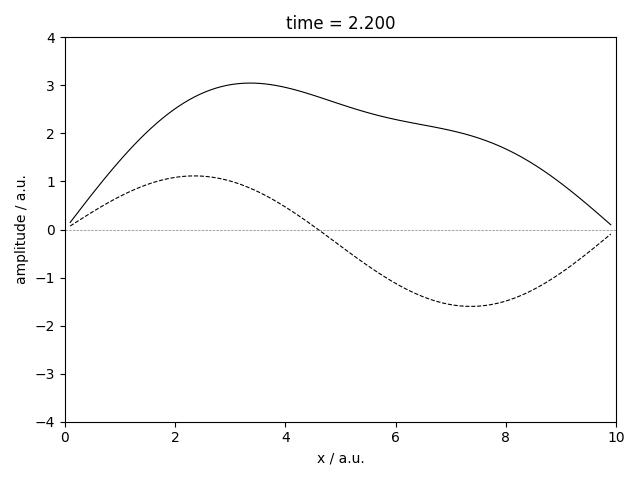

In [6]:
fig, ax = plt.subplots()

ax.set_xlim(x_total_arr[[0,-1]]), ax.set_ylim(-4,4)
ax.set_xlabel("x / a.u."), ax.set_ylabel("amplitude / a.u.")
title_form = "time = {:.3f}"
ax.set_title(title_form)

l, = ax.plot([],[],'--',linewidth=0.8,color='black')
l_env, = ax.plot([],[],linewidth=0.8,color=l.get_color())
ax.plot(ax.get_xlim(), [0,0], '--',linewidth=0.5, color='gray')

fig.tight_layout()

dt = 0.1
sf_arr = np.empty_like(x_arr, dtype=complex)

def init():
    sf_arr[:] = sf_t0_arr

def update(i):
    ax.set_title(title_form.format(t0+i*dt))
    prop.propagate(sf_arr, dt, Nt=15)
    l.set_data(x_arr, sf_arr.real)
    l_env.set_data(x_arr, np.abs(sf_arr))

ani = FuncAnimation(fig, update, frames=30, init_func=init)

In [7]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=5)
# ani.save("ani-test-3.gif", writer=writer)